# Lab One: Visualization and Data Preprocessing
### Ryan Bass, Brett Benefield, Cho Kim, Nicole Wittlin

# Business Understanding

The team selected data from the Belk Endowment Educational Attainment Data for North Carolina Public Schools, which contains the North Carolina Public Schools Report Card as well as the Statistical Profiles Databases. This data was compiled by Dr. Jake Drew from original sources provided by the Public Schools of North Carolina (http://ncpublicschools.org), and the compilation, research, and analysis of the educational attainment data was funded by the John M. Belk Endowment (JMBE).

JMBE’s mission is focused on postsecondary education in North Carolina to help underrepresented students access and complete postsecondary education and be better prepared for entering the workforce. The educational attainment data set contains comprehensive statistics, demographics, and achievement metrics about North Carolina public, charter, and alternative elementary, middle, and high schools. This wealth of data is the foundation for research to help JMBE understand trends and improve postsecondary pathways in the state.

Our team has selected a subset from the larger educational attainment data to explore the relationship between enrollment in postsecondary education within 16 months of high school graduation and teacher metrics related to teacher education, licensing, and certification, in addition to years of experience. This is important to help identify both positive and negative factors influencing students’ enrollment decisions and understand how educators can impact the pipeline to higher education.

Our efforts will include a model that will attempt to identify key attributes that will increase or decrease the percentage of students enrolled in a postsecondary education. The effectiveness of the model will be measured by how accurately our model performs against a test set of data. Our goal is to build a model that can predit the percentage of students who enrolled in postsecondary education within 25% of the real value.

# Data Meaning Type

We used the <a href="https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Raw%20Datasets/college-enrollment.csv">College Enrollment data set</a> and the <a href="https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Raw%20Datasets/personnel.csv">Personnel data set</a> available in the <a href="https://github.com/jakemdrew/EducationDataNC">EducationDataNC</a> repository published by Dr. Drew. 

#### College Enrollment data set
The college enrollment data set we examined has 12,827 rows of data, with 13 attributes. The data set contains counts and percentages of postsecondary enrollment action as defined by the US Department of Education C160 EDEN (Education Data Exchange Network) for students who graduated in 2015. The data has subgroups of counts and percentages by school, district, and the state. A status of ENROLL means the count or percentage enrolled in an institution of higher education (IHE) within 16 months of receiving a regular high school diploma, and NOENROLL means the count or percentage of students who did not enroll in an IHE within 16 months of receiving a high school diploma. 

The description of the attributes below can be found in the <a href="http://www.ncpublicschools.org/docs/src/researchers/data-dictionary.pdf">data dictionary</a> published by the NC Public Schools. 

| Attribute | Description | Type | % missing (in %) |
|----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|------------------|
| Graduation_year | Year students graduated from high school | Nominal | 0 |
| Unit_code | Code to identify school/LEA/State<br> Unit codes belonging to individual schools may be mapped to a given district using the first 3 characters of the unit code. For example, schools belonging to the district "995LEA" will each have unit code that begins with 995. | Nominal | 0 |
| leaname | LEA (Local Education Agency) Name <br> LEA is a commonly used acronym for a school district | Nominal | .2 |
| schname | School Name | Nominal | 19.4 |
| status | The postsecondary enrollment action as defined in the US Department of Education C160 EDEN (Education Data Exchange Network) specification <br>  <table><tr><td>Enroll</td><td>Enrolled in an IHE within 16 months of receiving a regular high school diploma</td></tr> <tr><td>NOENROLL</td><td>Did not enroll in an IHE within 16 months of receiving a regular high school diploma</td></tr> </table> | Nominal | 0 |
| subgroup | A subset of the total population that shares a common characteristic, like sex or race <br> INSERT HTML TABLE HERE | Nominal | 0 |
| Subgroup_name | Full description of the subgroup | Nominal | 0 |
| schcount | Count of students by subgroup and status (ENROLL, NOENROLL) within a school with masking applied | Continuous | 42.5 |
| leacount | Count of students by subgroup and status (ENROLL, NOENROLL) within a LEA/Charter with masking applied | Continuous | 12.9 |
| seacount | Count of students by subgroup and status (ENROLL, NOENROLL) within the State (SEA - State Educational Agency) | Continuous | 0 |
| sch_percent_enrolled | The percentage of enrolled students among total students (ENROLL Count/ TOTAL Count) within a school with masking applied | Ordinal | 75.1 |
| lea_percent_enrolled | The percentage of enrolled students among total students (ENROLL Count/ TOTAL Count) within a LEA/Charter with masking applied | Ordinal | 71.5 |
| sea_percent_enrolled | The percentage of enrolled students among total students (ENROLL Count/ TOTAL Count) within the State (SEA)\ | Ordinal | 70.8 |

#### College Enrollment Table Summary

The schcount is the count of students within a school that enrolled or did not enroll in an institute of higher education within 16 months of receiving their high school diploma. The values range from 5 to 423 in the data set. 

The leacount is the count of students within a LEA or Charter by subgroup and status. The values range from 5 to 5844 in the data set.

The seacount is the count of students within the state by subgroup and status. The values range from 49 to 51,362.

The "...percent_enrolled" attributes are on a scale from 0 to 100 and represent the percentage of enrolled students among total students within the school, LEA/Charter, or the state. 

#### Personnel data set
The Personnel data set we examined has 3,096 rows of data, with 68 attributes. The data set contains observations from 2017. The data dictionary available for the data set is from 2014 and only contains descriptions for 55 of the attributes. The description for the 55 attributes can be found in the <a href="http://www.ncpublicschools.org/docs/src/researchers/data-dictionary.pdf">data dictionary</a> published by the NC Public Schools. 

As part of the data preparation process, we removed data from the personnel set related to grade schools and middle schools (i.e. category codes E, M, and I) because we are focused on the segment of the pipeline that leads from high school to enrollment in postsecondary education. We also removed 26 attributes that contained 84.7% or more missing values. Out of the 26 attributes, 15 attributes contained no values. All 15 attributes were data about highly qualified teachers. 

| Column Name | Description | Type | % missing (in %) |
|-------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|-----------|
| Year | School Year | Nominal | 0 |
| Unit_code | Code to identify School/LEA/State | Nominal | 0 |
| School_Name | School Name | Nominal | 15.4 |
| Lea_Name | LEA Name | Nominal | .2 |
| State_Name | State Name | Nominal | 0 |
| Category_cd | Category code<br> <table><tr><td>E</td><td>School has elementary schools grades (PK-5)</td></tr> <tr><td>M</td><td>School has middle school grades (6-8)</td></tr> <tr><td>H</td><td>School has high school grades (9-13)</td></tr> <tr><td>I</td><td>School has elementary and middle school grades</td></tr> <tr><td>T</td><td>School has middle and high school grades</td></tr> <tr><td>A</td><td>School has elementary, middle, and high school grades</td></tr> </table> | Nominal | .1 |
| St_Prin_advance_dgr_pct | Percent of principals with advanced degrees at state level | Ordinal | .1 |
| St_1yr_prin_trnovr_pct | One year principal turnover rate at state level | Ordinal | .1 |
| St_Prin_male_pct | Percent of male principals at state level | Ordinal | .1 |
| St_prin_female_pct | Percent of female principals at state level | Ordinal | .1 |
| St_Prin_black_pct | Percent of black principals at state level | Ordinal | .1 |
| St_Prin_white_pct | Percent of white principals at state level | Ordinal | .1 |
| Prin_other_pct | Percent of principals of other races including Indian, Asian, Hispanic and Pacific-islander at LEA level | Ordinal | 84.7 |
| St_Prin_other_pct | Percent of principals of other races including Indian, Asian, Hispanic and Pacific-islander at state level | Ordinal | .1 |
| Flicensed_teach_pct | Percent of teachers that meet NC fully licensed definition at school level | Ordinal | 15.5 |
| Lea_flicensed_teach_pct | Average Percent of Teachers that meet NC fully licensed definition at LEA level | Ordinal | 6.7 |
| St_flicensed_teach_pct | Average Percent of Teachers that meet NC fully licensed definition at state level | Ordinal | .1 |
| Class_teach_num | Average number of classroom teachers at School Level | Continuous | 15.5 |
| Lea_class_teach_num | Average number of classroom teachers at LEA Level | Continuous | 6.7 |
| St_class_teach_num | Average number of classroom teachers at State Level | Continuous | .1 |
| nbpts_num | Number of National Board Certified staff at LEA level | Continuous | 20.9 |
| Lea_nbpts_num | Average number of National Board Certified staff at LEA level | Continuous | 6.7 |
| St_nbpts_num | Average number of National Board Certified staff at state level | Continuous | .1 |
| advance_dgr_pct | Percent of teachers with masters or higher degree at school level | Ordinal | 20.9 |
| Lea_advance_dgr_pct | Average percent of teachers with masters or higher degree at LEA level | Ordinal | 209 |
| St_advance_dgr_pct | Average percent of teachers with masters or higher degree at state level | Ordinal | .1 |
| _1yr_tchr_trnovr_pct | One Year Teacher turnover percentage at school level | Ordinal | 21.6 |
| Lea_1yr_tchr_trnovr_pct | One Year Teacher turnover percentage at LEA level | Ordinal | 209 |
| St_1yr_tchr_trnovr_pct | One Year Teacher turnover percentage at state level | Ordinal | .1 |
| Lateral_teach_pct | lateral entry teacher percentage at school level | Ordinal | 45.8 |
| Lea_lateral_teach_pct | Average lateral entry teacher percentage at LEA level | Ordinal | 6.7 |
| St_lateral_teach_pct | Average lateral entry teacher percentage at state level | Ordinal | .1 |
| Total_class_teacher_num | Number of classroom teachers | Continuous | 0 |
| Total_nbpts_num | Number of National Board Certified teachers | Continuous | 0 |

# Data Quality

In the college enrollment data set, we first removed all the records that summarized data at the district and state level. School level data includes enrollment percentages for both district and state level statistics.

Next, we examined the data set based on two key attributes: ENROLLED and ALL, which, when combined, created a subset all of the students that enrolled in postsecondary education. We limited this initial analysis to only this highest categorization of all students (rather than drilling down into gender, ethnicity, socio-economic status, etc.).

In the end, we found 27 schools that do not have district information and determined that this is because the schools are “charter and non-district affiliated schools.” This was the extent of our “NaN” data, which wasn’t actually missing. This will be important as we continue our analysis.

In [1]:
%matplotlib inline
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import HTML, display

In [2]:
%cd "C:\sandbox\SMU\dataMining\7331DataMining\EducationDataNC\2017\Raw Datasets"
dfCollege = pd.read_csv("college-enrollment.csv")
dfTeachers = pd.read_csv("personnel.csv")

C:\sandbox\SMU\dataMining\7331DataMining\EducationDataNC\2017\Raw Datasets


In [3]:
# Create a list of columns that are a specific data type
nominal = ['graduation_year', 'unit_code', 'leaname', 'schname', 'status', 'subgroup', 'subgroup_name']
continuous = ['schcount', 'leacount', 'seacount']
ordinal = ['sch_percent_enrolled', 'lea_percent_enrolled', 'sea_percent_enrolled']

# Convert data to correct data type
dfCollege[nominal] = dfCollege[nominal].astype(object)
dfCollege[continuous] = dfCollege[continuous].astype(float)
dfCollege[ordinal] = dfCollege[ordinal].astype(float)

In [4]:
# Only look at the overall total of students that enrolled in college
# The dataset further divides it based on various categories which we can explore later
dfCollegeAll = dfCollege[(dfCollege['subgroup'] == "ALL") & (dfCollege['status'] == "ENROLL")]

Unit_codes that include 'lea' or 'sea' indicate the information is for the district and state level. We are only focused on the school percentages for our analysis and so those records have been removed as the information is still retained in the columns pertaining to district and state counts/percentages. The information is redundant.

In [5]:
# Removed records that was duplication of data related to district and state which is recorded in other columns
# No information was lost by this removal of records
dfCollegeAll = dfCollegeAll[~dfCollegeAll['unit_code'].str.contains('LEA|SEA')]

As part of the data preparation process, we removed data from the personnel set related to grade schools and middle schools (i.e. category codes E, M, and I) because we are focused on the segment of the pipeline that leads from high school to enrollment in postsecondary education.

In [6]:
# Only include high school information
dfTeachersHS = dfTeachers[(dfTeachers.category_cd != "E") & (dfTeachers.category_cd != "M") & (dfTeachers.category_cd != "I")]

Duplicate information removed similar to College Enrollment data above.

In [7]:
# Remove schools identified by LEA and SEA unit_codes
dfTeachersHS = dfTeachersHS[~dfTeachersHS.unit_code.str.contains('LEA|SEA')]

Columns below are removed because they contain no information as described in Data Meaning section or is aggregated at the district and state level and we are only concerned with the school level.

In [8]:
# deleting variables with no observations
delCols = ['prin_other_pct',
'prinyrs_0thru3_pct',
'prinyrs_4thru10_pct',
'prinyrs_11plus_pct',
'prin_advance_dgr_pct',
'_1yr_prin_trnovr_pct',
'prin_male_pct',
'prin_female_pct',
'prin_black_pct',
'prin_white_pct',
'emer_prov_teach_pct',
'highqual_class_pct',
'lea_highqual_class_pct',
'lea_highqual_class_hp_pct',
'lea_highqual_class_lp_pct',
'lea_highqual_class_all_pct',
'lea_not_highqual_class_hp_pct',
'lea_not_highqual_class_lp_pct',
'lea_not_highqual_class_all_pct',
'st_highqual_class_pct',
'st_highqual_class_hp_pct',
'st_highqual_class_lp_pct',
'st_highqual_class_all_pct',
'st_not_highqual_class_hp_pct',
'st_not_highqual_class_lp_pct',
'st_not_highqual_class_all_pct']

dfTeachersHS = dfTeachersHS.drop(axis = 1, columns = delCols, errors = 'ignore')

### Simple Statistics
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics are meaningful.

In [9]:
dfCollegeAll.describe()

,schcount,leacount,seacount,sch_percent_enrolled,lea_percent_enrolled,sea_percent_enrolled
count,516.000000,516.000000,547.0,547.000000,516.000000,5.470000e+02
mean,99.377907,1131.872093,51362.0,50.075406,51.039605,5.198846e+01
std,80.102959,1480.693630,0.0,14.519520,6.882989,2.773653e-13
min,5.000000,18.000000,51362.0,5.405405,31.428571,5.198846e+01
25%,36.000000,252.000000,51362.0,42.597141,48.443157,5.198846e+01
50%,81.500000,607.000000,51362.0,52.123552,51.403721,5.198846e+01
75%,137.250000,1178.000000,51362.0,59.565017,54.686947,5.198846e+01
max,423.000000,5844.000000,51362.0,89.583333,67.379679,5.198846e+01


In [10]:
dfTeachersHS.describe()

,year,total_class_teacher_num,total_nbpts_num,flicensed_teach_pct,tchyrs_0thru3_pct,tchyrs_4thru10_pct,tchyrs_11plus_pct,class_teach_num,nbpts_num,advance_dgr_pct,...,st_prinyrs_0thru3_pct,st_prinyrs_4thru10_pct,st_prinyrs_11plus_pct,st_prin_advance_dgr_pct,st_1yr_prin_trnovr_pct,st_prin_male_pct,st_prin_female_pct,st_prin_black_pct,st_prin_white_pct,st_prin_other_pct
count,668.0,668.0,668.0,666.000000,598.000000,598.000000,598.000000,666.000000,598.00000,598.000000,...,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02
mean,2017.0,101107.0,11728.0,0.876333,0.205592,0.244065,0.550349,48.381381,6.22408,0.270998,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
std,0.0,0.0,0.0,0.124310,0.122497,0.104624,0.140097,35.139702,6.63072,0.128741,...,1.111059e-16,6.221929e-15,1.916576e-15,3.055411e-15,9.999528e-16,2.722094e-15,7.221882e-15,2.694317e-15,4.555341e-15,1.736029e-16
min,2017.0,101107.0,11728.0,0.200000,0.000000,0.000000,0.083000,2.000000,0.00000,0.000000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
25%,2017.0,101107.0,11728.0,0.833000,0.132250,0.188000,0.471000,15.000000,1.00000,0.188250,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
50%,2017.0,101107.0,11728.0,0.912000,0.197000,0.234000,0.556000,44.000000,4.00000,0.254000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
75%,2017.0,101107.0,11728.0,0.958000,0.261000,0.293000,0.636000,71.000000,9.00000,0.327750,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02
max,2017.0,101107.0,11728.0,1.000000,0.833000,0.857000,1.000000,159.000000,38.00000,0.800000,...,4.270000e-01,4.140000e-01,1.590000e-01,2.130000e-01,8.600000e-02,3.920000e-01,6.020000e-01,2.430000e-01,7.310000e-01,2.600000e-02


In [11]:
dfMergedSet = pd.merge(dfTeachersHS, dfCollegeAll, on = 'unit_code')

# deleting variables with no observations
delCols = ['prin_other_pct',
'prinyrs_0thru3_pct',
'prinyrs_4thru10_pct',
'prinyrs_11plus_pct',
'prin_advance_dgr_pct',
'_1yr_prin_trnovr_pct',
'prin_male_pct',
'prin_female_pct',
'prin_black_pct',
'prin_white_pct',
'emer_prov_teach_pct',
'highqual_class_pct',
'lea_highqual_class_pct',
'lea_highqual_class_hp_pct',
'lea_highqual_class_lp_pct',
'lea_highqual_class_all_pct',
'lea_not_highqual_class_hp_pct',
'lea_not_highqual_class_lp_pct',
'lea_not_highqual_class_all_pct',
'st_highqual_class_pct',
'st_highqual_class_hp_pct',
'st_highqual_class_lp_pct',
'st_highqual_class_all_pct',
'st_not_highqual_class_hp_pct',
'st_not_highqual_class_lp_pct',
'st_not_highqual_class_all_pct']

# dfMergedSet = dfMergedSet.drop(axis = 1, columns = delCols)

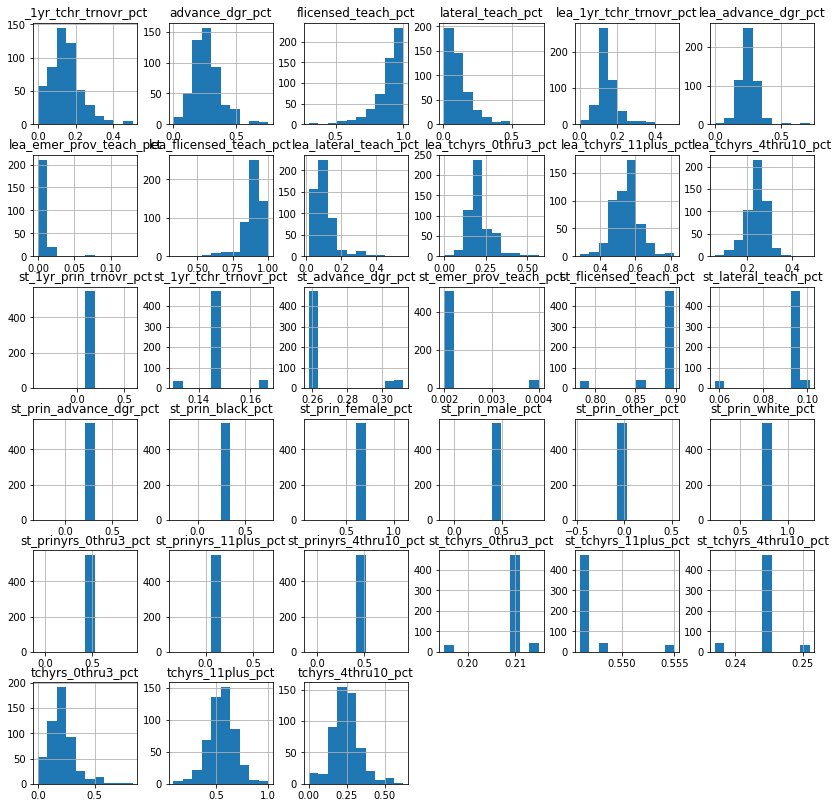

In [12]:
ordinalM = [col for col in dfMergedSet if '_pct' in col]
dfMergedSet[ordinalM].describe()
ax42 = dfMergedSet.hist(column = ordinalM, figsize = (14,14))

# Visualize Attributes

Text(0,0.5,'Percentage (%)')

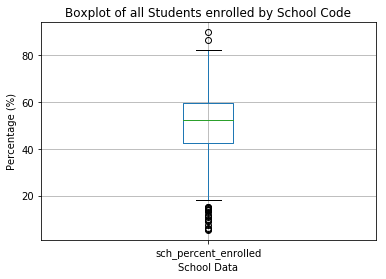

In [13]:
ax = dfCollegeAll.boxplot(column = ['sch_percent_enrolled'])
plt.title('Boxplot of all Students enrolled by School Code')
ax.set_xlabel('School Data')
ax.set_ylabel('Percentage (%)')

Missing values removed from district calculations as these schools are Non-District schools and therefore do not have data on the district level

Text(0,0.5,'Percentage (%)')

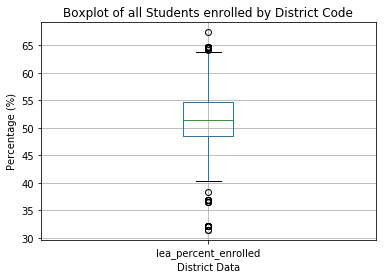

In [14]:
dfDistrict = dfCollegeAll[dfCollegeAll['leacount'].notna()]
ax = dfDistrict.boxplot(column = ['lea_percent_enrolled'])
plt.title('Boxplot of all Students enrolled by District Code')
ax.set_xlabel('District Data')
ax.set_ylabel('Percentage (%)')

# Explore Joint Attributes

In [15]:
# Let's give these better names
colNames = {'year': 'Graduation Year', 'unit_code': 'School ID', 'category_cd': 'Grades Taught', 
            'total_class_teacher_num': 'No. Classroom Teachers', 'total_nbpts_num': 'No. Board Certified Teachers',
            'School_Name': 'School Name', 'Lea_Name': 'District Name', 'State_Name': 'State Name', 
            'flicensed_teach_pct': '% Licensed Teachers', 'tchyrs_0thru3_pct': '% 0-3 Year Experience',
            'tchyrs_4thru10_pct': '% 4-10 Year Experience', 'tchyrs_11plus_pct': '% 11+ Year Experience', 
            'class_teach_num': 'Avg. No. Classroom Teachers at School', 
            'nbpts_num': 'No. Board Certified Teachers at School', 'advance_dgr_pct': '% of Masters+ at School Level',
            'sch_percent_enrolled': '% Enrolled in College by School', 'lea_percent_enrolled': '% Enrolled in College by District'}
dfMergedSet.rename(columns=colNames, inplace=True)

In [16]:
corrColumnNames = [ '% Licensed Teachers',
                    '% 0-3 Year Experience',
                    '% 4-10 Year Experience',
                    '% 11+ Year Experience',
                    'Avg. No. Classroom Teachers at School',
                    'No. Board Certified Teachers at School',
                    '% of Masters+ at School Level',
                    '% Enrolled in College by School',
                    '% Enrolled in College by District']

In [17]:
dfMergedSet[corrColumnNames].corr('pearson')

,% Licensed Teachers,% 0-3 Year Experience,% 4-10 Year Experience,% 11+ Year Experience,Avg. No. Classroom Teachers at School,No. Board Certified Teachers at School,% of Masters+ at School Level,% Enrolled in College by School,% Enrolled in College by District
% Licensed Teachers,1.000000,-0.651069,0.155117,0.486465,0.069671,0.295085,0.346493,0.203514,0.144762
% 0-3 Year Experience,-0.651069,1.000000,-0.268349,-0.725658,0.005392,-0.206307,-0.347711,-0.132224,-0.129139
% 4-10 Year Experience,0.155117,-0.268349,1.000000,-0.468081,-0.003540,-0.045768,0.032191,-0.068064,-0.008740
% 11+ Year Experience,0.486465,-0.725658,-0.468081,1.000000,-0.002312,0.221918,0.295974,0.170164,0.124554
Avg. No. Classroom Teachers at School,0.069671,0.005392,-0.003540,-0.002312,1.000000,0.737186,-0.072195,0.174743,0.122355
No. Board Certified Teachers at School,0.295085,-0.206307,-0.045768,0.221918,0.737186,1.000000,0.150347,0.253898,0.209085
% of Masters+ at School Level,0.346493,-0.347711,0.032191,0.295974,-0.072195,0.150347,1.000000,0.062271,0.027633
% Enrolled in College by School,0.203514,-0.132224,-0.068064,0.170164,0.174743,0.253898,0.062271,1.000000,0.408315
% Enrolled in College by District,0.144762,-0.129139,-0.008740,0.124554,0.122355,0.209085,0.027633,0.408315,1.000000


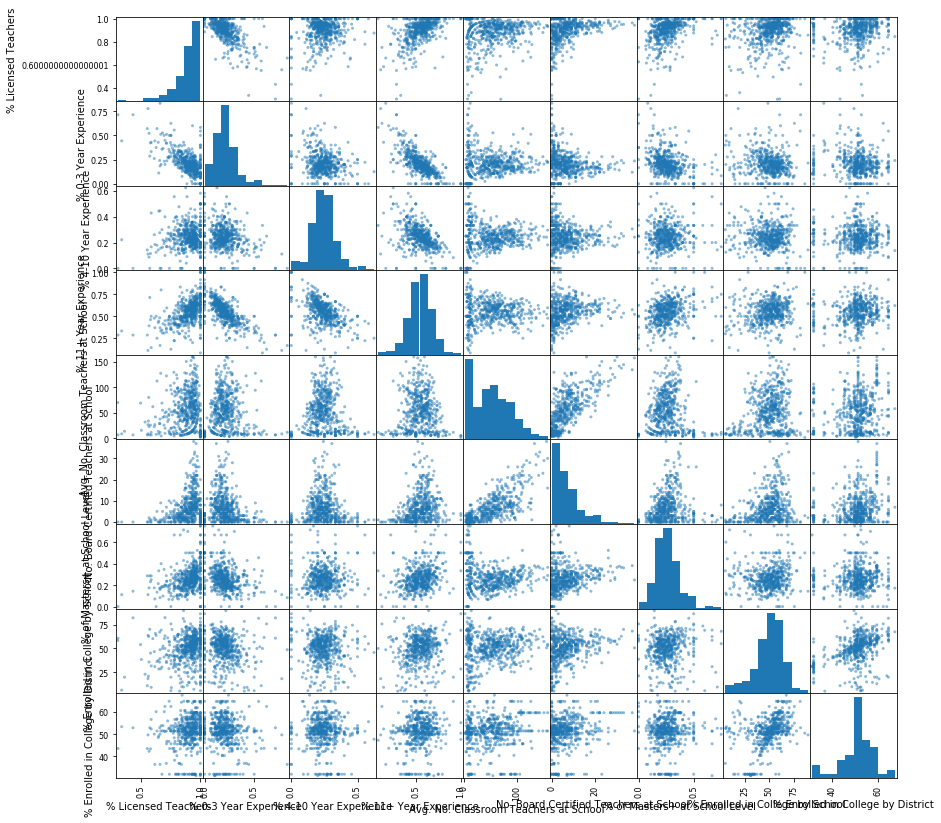

In [18]:
ax = scatter_matrix(dfMergedSet[corrColumnNames], figsize = (14, 14))

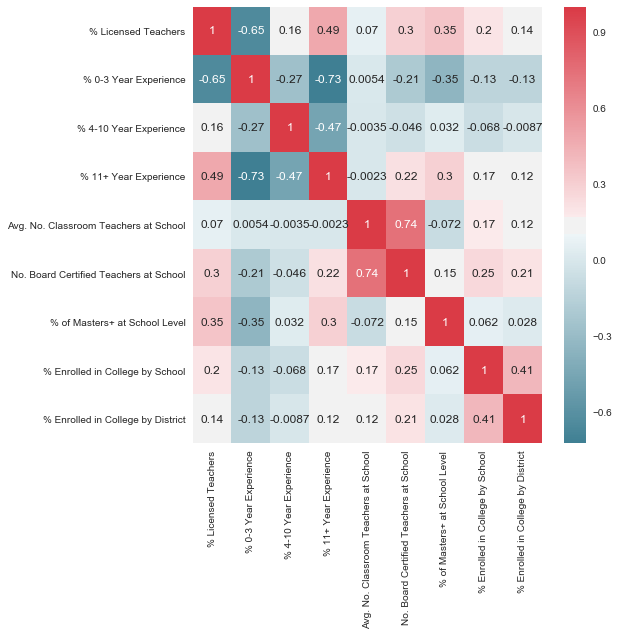

In [19]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(dfMergedSet[corrColumnNames].corr(), cmap=cmap, annot=True)

f.tight_layout()

The correlation heatmap helps visualize linear relationships easier by color coding a matrix. The most notable positive linear relationships between our response variable (percent of students enrolled in college by school) and any explanatory variables of our teachers experience is the percentage of licensed teachers at a school (r = 0.22), the number of board certified teachers at school (r = 0.19), the percent of teachers with 11+ years of experience teaching (r = 0.15), and the percent of teachers with graduate degrees or more (r = 0.14). Although qualities of a teachers are sometimes hard to measure, the ones that are in the form of experience and accolades (licensure, board certified, and graduate degrees) show a weak linear relationship with the percentage of high school students who enroll in college.

The strongest linear correlation of the heatmap with normalized data can be found with the percent of teachers with 11+ years of experience teaching and the percentage of licensed teachers (r = 0.46). This would make sense that as you continue along in your career in teaching, your likelihood of acquiring your license would be more likely. A similar linear correlation coefficient of 0.35 can be found between percent of teachers with graduate degrees and the percent of licensed teachers. Lastly, the percent of teachers with graduate degrees and percent of teachers with 11+ years of experience has a linear correlation coefficient of 0.32. All of this ties into the idea of associations with teachers who have had long careers in education have achieved high accolades in doing so.

Text(0.5,0,'Quartiles of % College Enrolled')

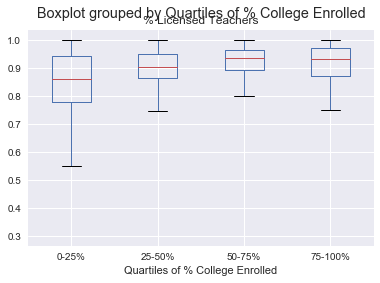

In [20]:
# Code adapted from https://stackoverflow.com/questions/23232989/boxplot-stratified-by-column-in-python-pandas
breaks = np.asarray(np.percentile(dfMergedSet['% Enrolled in College by School'], [25,50,75,100]))
dfMergedSet['Quartiles of % College Enrolled'] = (dfMergedSet['% Enrolled in College by School'].values > breaks[..., np.newaxis]).sum(0)
ax = dfMergedSet.boxplot(column='% Licensed Teachers', by='Quartiles of % College Enrolled')
ax.xaxis.set_ticklabels(['0-25%', '25-50%', '50-75%', '75-100%'])
ax.set_xlabel('Quartiles of % College Enrolled')

To look for differences in distributions of teacher attributes on the percentage of students who enrolled in college we broke this metric into quartiles. There is a clear trend in increasing median percentage of licensed teachers as the quartiles of the percent of students at those schools enrolled in college after graduation. The difference between the lowest and highest quartile is about an eight percent increase in teachers who were licensed. Interestingly, the variability decreases for the quartiles as they increase except for the highest quartile which has more variability than the second quartile even though its median is still higher.

Text(0.5,1,'')

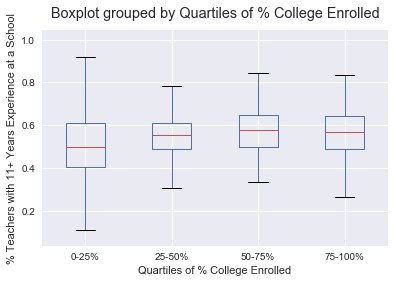

In [21]:
ax2 = dfMergedSet.boxplot(column='% 11+ Year Experience', by='Quartiles of % College Enrolled')
ax2.xaxis.set_ticklabels(['0-25%', '25-50%', '50-75%', '75-100%'])
ax2.set_xlabel('Quartiles of % College Enrolled')
ax2.set_ylabel('% Teachers with 11+ Years Experience at a School')
ax2.set_title('')

To look for differences in distributions of teacher attributes on the percentage of students who enrolled in college we broke this metric into quartiles. While the median percentage of teachers who have 11+ years of experience increases from the last quartile (0-25%) of schools who have the lowest percent of students who enroll in college, the median stays very constant in the other three quartiles. The same trend is apparent in their variances as well.

# Explore Attributes and Class

We believe there is a relationship between years of experience, education, and licensed teachers. This will require further analysis once we have our dataset merged correctly.

# New Features

As we continued the exploratory analysis related to college enrollment and personnel, we discussed if there might be interesting trends if health data were incorporated into the analysis. With the advent of Fitbit and Apple Watch technology, people are actively monitoring personal health, and health trends are becoming more prevalent in discussions about business and society. Additionally, most schools have metrics related to physical education, which could be incorporated into the data set and analysis. Attributes such as average number of daily steps, number of times exercised per week, resting heart rate, and school recess vs. no recess, for both students and teachers, might be useful.

# Exceptional Work


Our team initially started out exploring another data set from Kaggle – Data Science for Social Good: Kiva Crowdfunding. The Kaggle competition asked participants to build localized models to estimate poverty levels where Kiva is providing microloans. After initial exploratory analysis, we found that the data set was not robust enough to support building models due to a lack of clear response variables. Thus, we decided to change to the North Carolina Educational Attainment data. Much of work this week was focused on understanding and connecting the College Enrollment and Personnel data sets. We have additional work to do on the analysis of the resulting joint data.